<a href="https://colab.research.google.com/github/DipanshuKumar449/EDA-PlayStore-App-Review/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## World of Apps

No, doubt Mobile Applications are trending, ever wonder why?
The reasons are well known:

*   Makes life easy 
*   Apps are fun

*   Communication and Engagement
*   Smart marketing, Lead generations and many more.

### Analyse Reviews

Analysing reviews seriously, why is it even necessary?

>The answer is quite simple..

*   To help targeting the most impactful improvement to app,can view top trends and issues that the user mentions.
*   Through comprehensive analysis of designated apps, optimizing the ratings and reviews maintains high reputation.
*   1000+ 5-star ratings and high quality review contents have driven a lots of downloads, with massive percentage increase in conversion.







Lets now deep dive into our data files:
containing two files

*  Play Store Data.csv : It consists of name of applications and a total of 13 features describing the app.
*  User Reviews.csv : This file consists of 3 important features on how the use use feel regarding the app.



### Now let's kickstart the journey

## 1.Importing and Understanding the Dataset

In [ ]:
# importing all the necessary modules for the analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
# Reading the dataset

df_apps = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Exploratory Data Analysis/Play Store Data.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_apps.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [ ]:
# getting the shape
df_apps.shape

(10841, 13)

In [ ]:
# getting information for better understanding
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## 2.Data Cleaning

Incorrect, inconsitent data can lead to false conclusion and misdirects the scales.So, detecting and correcting of inaccurate records is necessary to maintain the flow.



*   After looking to the dataset the first thing comes in mind is that we have to 
deal with some special characters. Specifically some important features like Size, Install, Price contains characters like(' M ',' k ' ' , ' + ',' $ ') these column needs to be present in numerical form for furture analysis.
*   So, Moving on to remove the special characters from the respective features(columns).


*   While running the code one row i.e 10474 is a wrong feed so it need has to be removed


> To acheive this we use drop function




In [ ]:
df_apps= df_apps.drop(10472)

In [ ]:
# While running this code, it throughs Future warning to handle this we use import warnings

import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

# Simply using replace method for this task

# Working on column(install).
# Removing '+' and ',' from it.

df_apps['Size'] = df_apps['Size'].str.replace('M','').str.replace('k','')


# Working on column(install).
# Removing '+' and ',' from it.

df_apps['Installs'] = df_apps['Installs'].str.replace('+','').str.replace(',','')

# Working on column(price).
# Removing '$' from it.

df_apps['Price'] = df_apps['Price'].str.replace('$','')

df_apps.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


### Changing the datatypes of all the columns which had to be of Numerical type but present as string for numerical evaluations.
*   The challenge will be to convert the columns ['Installs','Price']
into 'float type'

> To acheive this we simply use the advantages of astype()






















In [ ]:
# Following steps explained above:

df_apps['Installs'] = df_apps['Installs'].astype(float)
df_apps['Price'] = df_apps['Price'].astype(float)

In [ ]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.2+ MB


## 3. First Observation

Understanding the trend : Using Highest and Lowest values.

> Benifits of determining trend??

* Trend analysis allow to predict what's going to happen, based on whats already happend. It provides business with the information enabling to make data driven decisions with regards to future events. 







Based on the dataset we are first determining which Category has the highest impact in the world and which categoey is struggling to get the path.

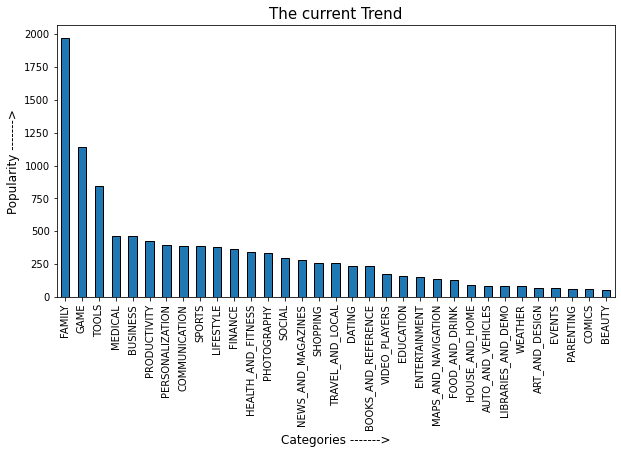

In [ ]:
# Ploting the barplot for Category column

trend_cat = df_apps['Category'].value_counts()

trends = trend_cat.plot.bar(figsize= (10,5) , linewidth = 1 , edgecolor = 'black')
trends.set_title('The current Trend',fontsize = 15)
trends.set_xlabel('Categories ------->',fontsize =12)
trends.set_ylabel('Popularity ------->',fontsize =12)
plt.show()




1.   Intresting results, but somewhat expected that Family and Game are ruling at the top.
2.   Any idea regarding Beauty and comics?? I think it requires Proactivity and Anticipations..

> Fine!! Data Analysis helped in improving our decision making process significantly.



